<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Meme_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from my_library import *

13:31:05 Starting...
13:31:05 Installing yfinance into Google notebook...
13:31:14 Installing arch into Google notebook...
13:31:24 Initialized.


In [ ]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.287764,-7.610570,-8.919507,-8.683071,-4.058241,-8.816504,-3.975716,-6.739054,-8.241209,-6.075152,...,-12.243737,-8.257118,-7.796392,-3.157539,-14.846602,-7.014469,-7.047079,-6.206744,-5.582753,-6.217684
2025-05-24,2.111188,-0.053490,0.389439,-0.430221,-1.084222,1.214575,0.488242,-0.011870,0.011461,-0.448684,...,0.682372,-2.436350,0.628931,1.093037,3.097889,2.382991,0.455141,0.310184,1.528067,-0.134585
2025-05-25,2.768446,1.752741,0.414398,2.003329,0.263139,-1.788235,1.119058,0.523929,-0.152224,-0.302282,...,-1.565238,-0.224375,0.625000,-0.158897,-0.824332,0.661445,-1.410093,0.607987,0.484904,0.564863


13:31:28 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


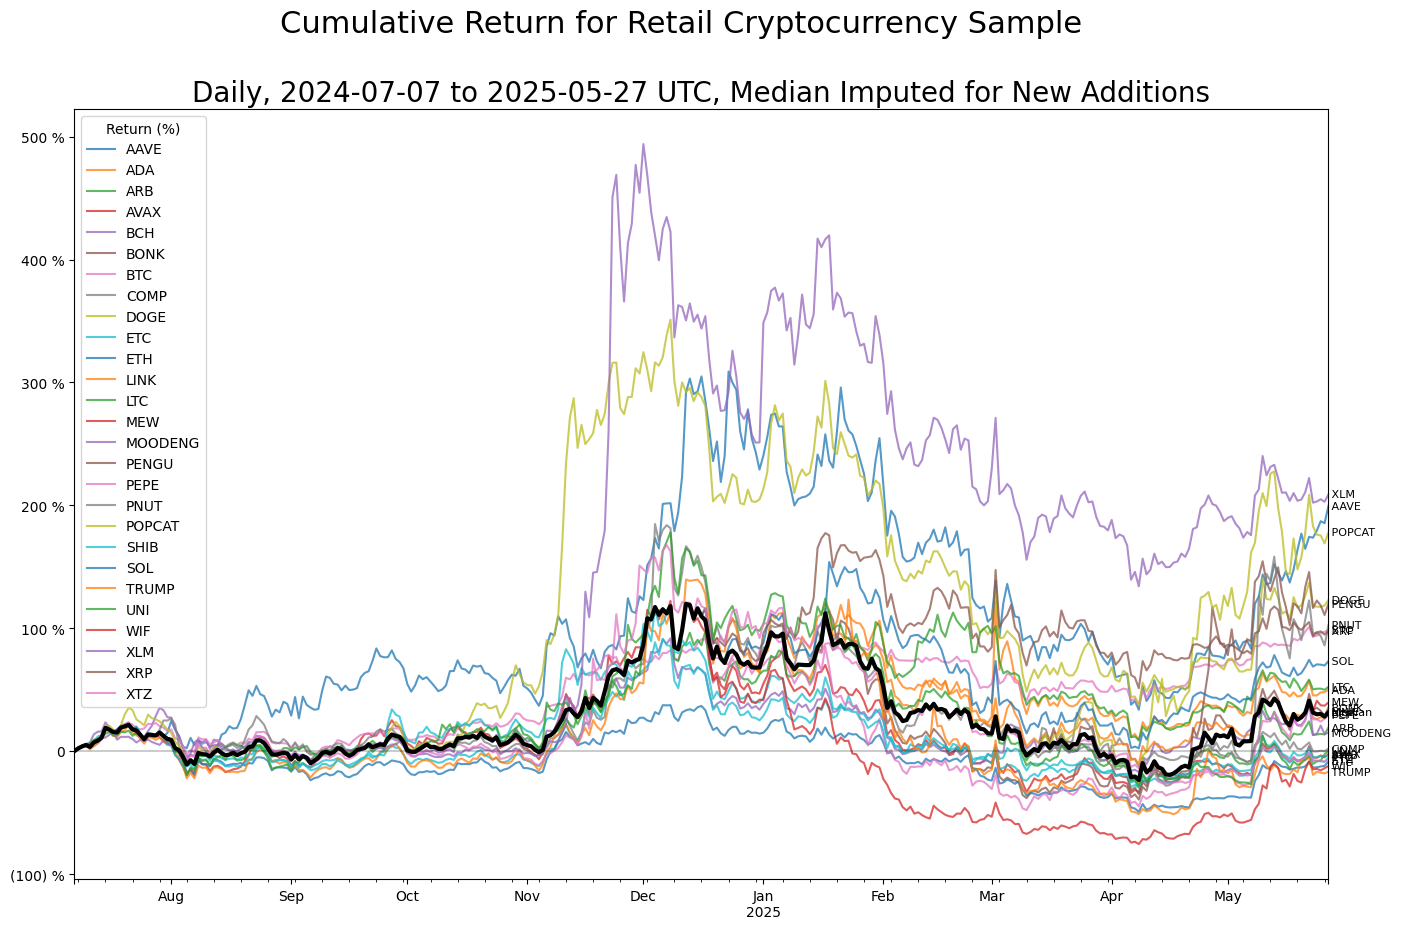

In [ ]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

13:36:47 Wrote figure to 'Data Existence Matrix for Robinhood Cryptocurrency Sample.png'.


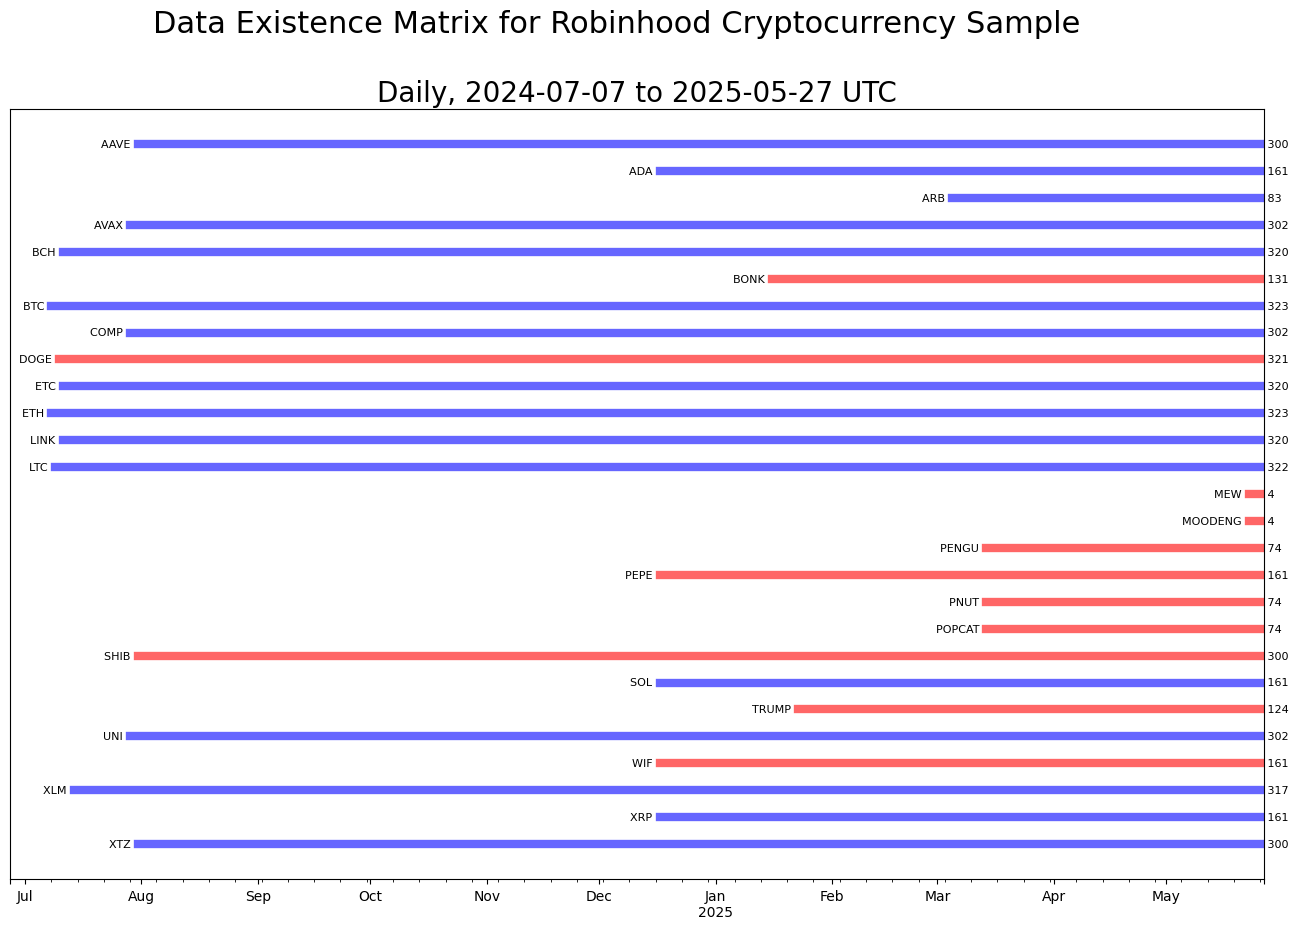

In [ ]:
# data existence matrix
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
meme_coins="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG".split(",")

(df:=data.apply(lambda x:pd.Series(x.items(),index=x.index).apply(lambda y:np.nan if np.isnan(y[1]) else list(reversed(data.columns)).index(y[0])),axis=1)).plot(
    ax=plot,
    legend=False,
    color=list(map(lambda c:"red" if c in meme_coins else "blue",df.columns)),
    linewidth=6,
    alpha=0.6
)
plot.set_xlabel(None)
figure.suptitle(title:='Data Existence Matrix for Robinhood Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data.index[0],data.index[-1]),fontsize=20)
plot.yaxis.set_visible(False)

for coin in data:
    plot.text(x:=df[coin].first_valid_index(),y:=df.loc[x,coin],coin+'  ',fontsize=8,ha='right',va='center')
    plot.text(xx:=df[coin].last_valid_index(),y," {:,d}".format((xx-x).n),fontsize=8,ha='left',va='center')

plot.set_xlim(df.index[0]-10,None)
figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

13:36:51 Excluding recently listed coins from analysis: MEW, MOODENG...
13:36:52 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5588235294117647), pvalue=np.float64(0.02443651142450573))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.479099,0.859815,5.177046,75,0.597794,1.438314,0.150345,,1,0.0
ADA,0.105852,0.210015,4.150194,75,0.479223,0.438240,0.661212,,2,0.0
ARB,0.414398,0.392038,5.665115,75,0.654151,0.599308,0.548967,,3,0.0
AVAX,0.226491,0.447634,4.856511,75,0.560782,0.798232,0.424736,,4,0.0
BCH,0.159456,0.428451,4.025442,75,0.464818,0.921760,0.356654,,5,0.0
BTC,0.312821,0.441551,2.409553,75,0.278231,1.586993,0.112514,,7,0.0
COMP,-0.034642,0.176192,4.061253,75,0.468953,0.375713,0.707130,,8,0.0
ETC,-0.152956,0.139974,3.614244,75,0.417337,0.335398,0.737325,,10,0.0
ETH,0.180144,0.579529,4.585256,75,0.529460,1.094566,0.273707,,11,0.0


13:36:52
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5.884
Date:                Tue, 27 May 2025   Prob (F-statistic):             0.0294
Time:                        13:36:52   Log-Likelihood:                 4.6057
No. Observations:                  16   AIC:                            -5.211
Df Residuals:                      14   BIC:                            -3.666
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.479099,0.859815,5.177046,75,0.597794,1.438314,0.150345,,1,0.0,0.528790
ADA,0.105852,0.210015,4.150194,75,0.479223,0.438240,0.661212,,2,0.0,0.503272
ARB,0.414398,0.392038,5.665115,75,0.654151,0.599308,0.548967,,3,0.0,0.477754
AVAX,0.226491,0.447634,4.856511,75,0.560782,0.798232,0.424736,,4,0.0,0.452236
BCH,0.159456,0.428451,4.025442,75,0.464818,0.921760,0.356654,,5,0.0,0.426718
BONK,0.176783,1.246163,7.871585,75,0.908932,1.371018,0.170369,,6,1.0,NaN
BTC,0.312821,0.441551,2.409553,75,0.278231,1.586993,0.112514,,7,0.0,0.401201
COMP,-0.034642,0.176192,4.061253,75,0.468953,0.375713,0.707130,,8,0.0,0.375683
DOGE,0.022926,0.576065,5.181511,75,0.598309,0.962821,0.335637,,9,1.0,NaN


13:36:53 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


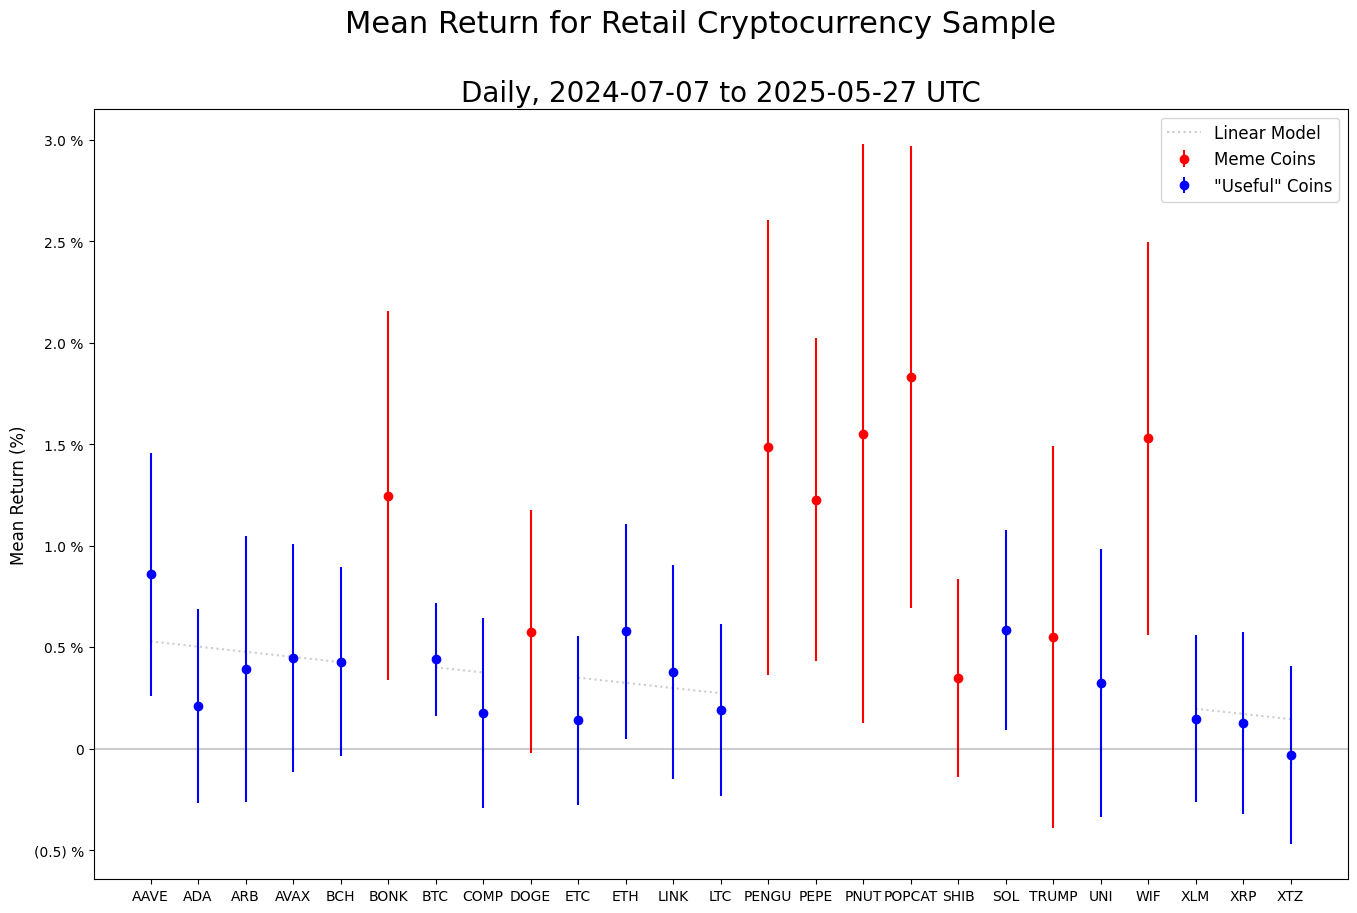

In [ ]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in meme_coins else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [2]:
from statsmodels.stats.anova import anova_lm

nprint("One Way ANOVA Analysis by {}".format(group_name:="Meme Coin"))
anova=anova_lm(OLS(report["Mean"],add_constant(report[group_name])).fit(),typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

NameError: name 'nprint' is not defined